In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
import io
%cd "C:\Users\deepe\OneDrive\Desktop\Python Datasets\House Price Advanced Regression Techniques"

C:\Users\deepe\OneDrive\Desktop\Python Datasets\House Price Advanced Regression Techniques


In [224]:
housetrain=pd.read_csv("train.csv")

In [225]:
housetest=pd.read_csv("test.csv")

In [226]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [227]:
housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [228]:
# Temporarily add dependent variable Saleproce intest data - For concatination
housetest["SalePrice"]="test"

In [229]:
# Row wise concatenation of dataframes fro preprocessing
combinedf=pd.concat([housetrain,housetest],axis=0)

In [230]:
pd.set_option("display.max_rows",82)
combinedf.isnull().sum().sort_values(ascending=False)
# Data size is 2919 rows or observations

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
BsmtHalfBath        2
BsmtFullBath        2
GarageArea          1
BsmtFinSF1          1
SaleType            1
GarageCars          1
BsmtUnfSF           1
Electrical          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
TotalBsmtSF         1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

In [231]:
# Split data in to object and numeric calls for pre-processing
objcols=combinedf.select_dtypes(include=["object"])
numcols=combinedf.select_dtypes(include=np.number)
# np.number will select both int64 & float64

In [232]:
# %missing values in each variable/columns
objcols.isnull().sum().sort_values(ascending=False)/objcols.shape[0]

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
GarageCond       0.054471
GarageQual       0.054471
GarageFinish     0.054471
GarageType       0.053786
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MSZoning         0.001370
Utilities        0.000685
Functional       0.000685
Exterior2nd      0.000343
Electrical       0.000343
SaleType         0.000343
Exterior1st      0.000343
KitchenQual      0.000343
RoofStyle        0.000000
Neighborhood     0.000000
SaleCondition    0.000000
ExterQual        0.000000
LotShape         0.000000
LandContour      0.000000
ExterCond        0.000000
PavedDrive       0.000000
LotConfig        0.000000
LandSlope        0.000000
Condition1       0.000000
HouseStyle       0.000000
Condition2       0.000000
Foundation       0.000000
RoofMatl         0.000000
Street      

In [233]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [234]:
# variables that have very high missing values which wil be imputed with word 'missing'
nacols=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]
for col in nacols:
    objcols[col]=objcols[col].fillna("Missing")

In [235]:
# Selecting coloumns with similar names
garagecols=objcols[[x for x in objcols.columns if "Garage" in x]]

In [236]:
# Printing frequency counts if multiple variables
for col in garagecols.columns:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64
TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64
TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64


In [237]:
bsmtcols=objcols[[x for x in objcols.columns if "Bsmt" in x] ]

In [238]:
for col in bsmtcols.columns:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64
TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64
No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [239]:
# After going through data description NA in bsmtcols & garagecols means nogarage or nobasament
for col in garagecols.columns:
    objcols[col]=objcols[col].fillna('No')

In [240]:
for col in bsmtcols.columns:
    objcols[col]=objcols[col].fillna('No')

In [241]:
# Remaining variables very few missing values -  most_frequent imputation can be done
for cols in objcols.columns:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())

In [242]:
# %missing values in numcols 
numcols.isnull().sum().sort_values(ascending=False)/objcols.shape[0]

LotFrontage      0.166495
GarageYrBlt      0.054471
MasVnrArea       0.007879
BsmtHalfBath     0.000685
BsmtFullBath     0.000685
BsmtFinSF2       0.000343
GarageCars       0.000343
GarageArea       0.000343
TotalBsmtSF      0.000343
BsmtUnfSF        0.000343
BsmtFinSF1       0.000343
KitchenAbvGr     0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
Id               0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
MSSubClass       0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
YrSold           0.000000
dtype: float64

In [243]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [244]:
catcols=numcols[['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold','YrSold']]

In [245]:
numcols=numcols.drop(['OverallQual','OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold'],axis=1)

In [246]:
# create a numeric missing code like 9999
catcols.GarageYrBlt=catcols.GarageYrBlt.fillna(9999)

In [247]:
#impute missing values in in numcols with median
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [248]:
from sklearn.preprocessing import LabelEncoder

In [249]:
numcols['SalePrice']=objcols.SalePrice

In [250]:
objcols=objcols.drop('SalePrice',axis=1)

In [251]:
# dummy variable encoding
objcols_encode=objcols.apply(LabelEncoder().fit_transform)

In [252]:
# dummy variable encoding
catcols_encode=catcols.apply(LabelEncoder().fit_transform)

In [253]:
numcols=numcols.drop('SalePrice',axis=1)

In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [256]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [257]:
numcols_scaled=numcols_scaled.reset_index()

In [258]:
objcols_encode=objcols_encode.reset_index()

In [259]:
catcols_encode=catcols_encode.reset_index()

In [260]:
# columns concatenation of all 3 dataframes into 1
combinedf_clean=pd.concat([numcols_scaled,catcols_encode,objcols_encode,],axis=1)

In [261]:
combinedf_clean=combinedf_clean.drop('index',axis=1)

In [262]:
combinedf=combinedf.reset_index()

In [263]:
combinedf_clean['SalePrice']=combinedf.SalePrice

In [264]:
housetrain_df=combinedf_clean[combinedf_clean.SalePrice!='test']

In [265]:
housetest_df=combinedf_clean[combinedf_clean.SalePrice=='test']

In [266]:
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [267]:
housetest_df.shape

(1459, 80)

In [268]:
combinedf_clean.shape

(2919, 81)

In [269]:
y=housetrain_df.SalePrice
X=housetrain_df.drop(['Id',"SalePrice"],axis=1)

In [270]:
X.shape

(1460, 79)

<Axes: ylabel='Frequency'>

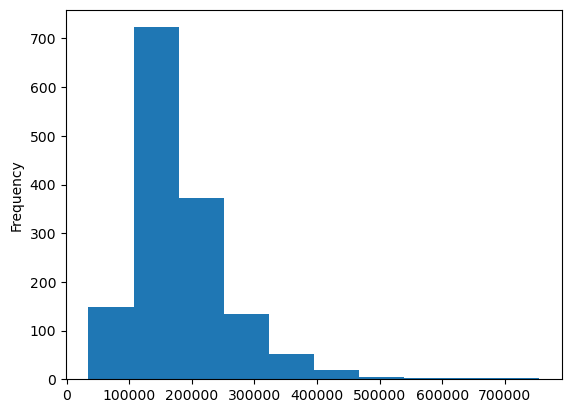

In [271]:
# create histogram, boxplot and destiny plot y and interpret 
y.plot(kind='hist')

<Axes: >

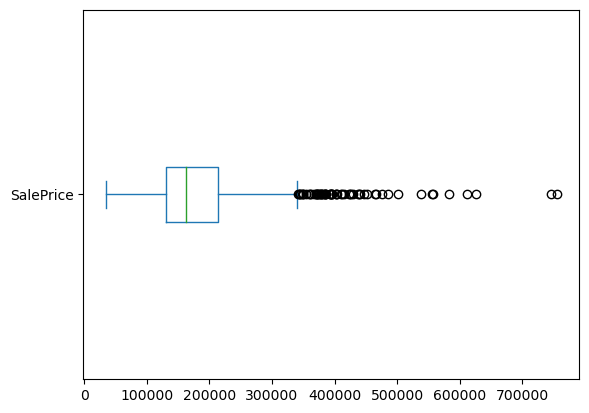

In [272]:
y.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

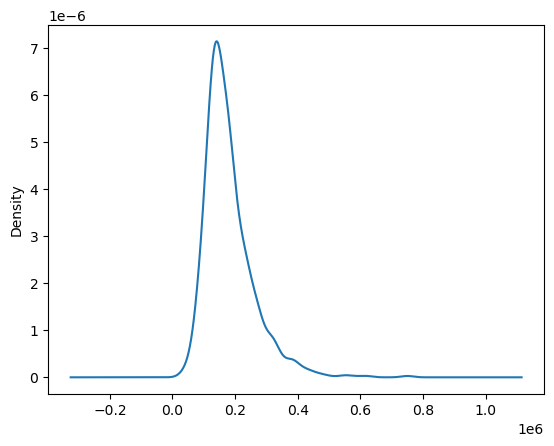

In [273]:
y.plot(kind='density')

In [274]:
y=y.astype('int64')

In [275]:
y.dtype

dtype('int64')

In [276]:
print(y.skew())
print(y.kurt())

1.8828757597682129
6.536281860064529


In [277]:
y=np.log1p(y) #logarathemic transformation

C:\Users\deepe\AppData\Local\Temp\ipykernel_10408\3881980836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='SalePrice', ylabel='Density'>

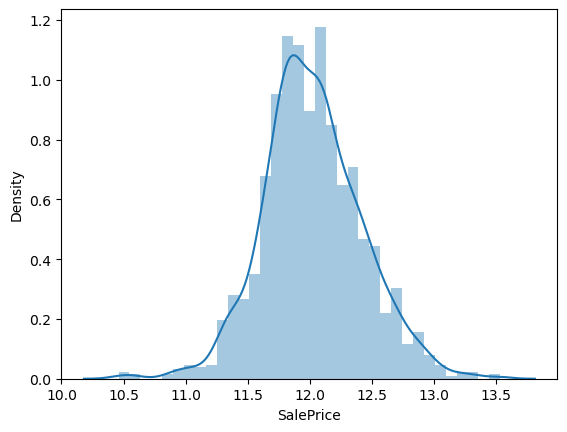

In [278]:
import seaborn as sns
sns.distplot(y)

In [279]:
for col in objcols:
    freq=objcols[col].value_counts()
    print(freq)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Missing    2721
Grvl        120
Pave         78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste    

In [280]:
# Test Null Average SalePrice of different Street Equal
housetrain.SalePrice.groupby(housetrain.Street).mean()

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

In [281]:
from scipy.stats import ttest_ind

In [282]:
# Split
streetp=housetrain[housetrain.Street=='Pave']
streetg=housetrain[housetrain.Street=='Grvl']

In [283]:
ttest_ind(streetp.SalePrice,streetg.SalePrice,equal_var=False)
# Since pvalue=0.11504797250476277 is greater than 0.05, Fail to Reject Null

Ttest_indResult(statistic=1.900787855911007, pvalue=0.11504797250476277)

In [284]:
# Test Null Average SalePrice of different CentralAir Equal
housetrain.SalePrice.groupby(housetrain.CentralAir).mean()

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64

In [285]:
# Split
Cy=housetrain[housetrain.CentralAir=='Y']
Cn=housetrain[housetrain.CentralAir=='N']

In [286]:
ttest_ind(Cy.SalePrice,Cn.SalePrice,equal_var=False)
# Since pvalue=2.280814388186851e-37 is less than 0.05, Reject Null

Ttest_indResult(statistic=17.267772563668995, pvalue=2.280814388186851e-37)

In [287]:
# Test Null Average SalePrice of different LandSlope Equal
housetrain.SalePrice.groupby(housetrain.LandSlope).mean()

LandSlope
Gtl    179956.799566
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64

In [288]:
from scipy.stats import f_oneway

In [289]:
# Split
lg=housetrain[housetrain.LandSlope=='Gtl']
lm=housetrain[housetrain.LandSlope=='Mod']
ls=housetrain[housetrain.LandSlope=='Sev']

In [290]:
f_oneway(lg.SalePrice,lm.SalePrice,ls.SalePrice)
# Since pvalue=0.1413963584114019 is greater than 0.05, Fail to Reject Null

F_onewayResult(statistic=1.9588170374149438, pvalue=0.1413963584114019)

In [291]:
# Test Null Averaage SalePrice of Different LotShape Equal
housetrain.SalePrice.groupby(housetrain.LotShape).mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [292]:
# Split
lot1=housetrain[housetrain.LotShape=='IR1']
lot2=housetrain[housetrain.LotShape=='IR2']
lot3=housetrain[housetrain.LotShape=='IR3']
lotreg=housetrain[housetrain.LotShape=='Reg']

In [293]:
f_oneway(lot1.SalePrice,lot2.SalePrice,lot3.SalePrice,lotreg.SalePrice)
# Since pvalue=6.447523852011766e-25 is less than 0.05, Reject Null

F_onewayResult(statistic=40.132851662262944, pvalue=6.447523852011766e-25)

In [294]:
# 3 ChiSquare test
# Test Null No Association between LotShape and Utilities
pd.crosstab(housetrain.LotShape,housetrain.Utilities)

Utilities,AllPub,NoSeWa
LotShape,,
IR1,483,1
IR2,41,0
IR3,10,0
Reg,925,0


In [295]:
from scipy.stats import chi2_contingency

In [296]:
chi2_contingency(pd.crosstab(housetrain.LotShape,housetrain.Utilities))
# Since pvalue=0.5686975328576362 is greater than 0.05, Fail to Reject Null

Chi2ContingencyResult(statistic=2.0179110564804374, pvalue=0.5686975328576362, dof=3, expected_freq=array([[4.83668493e+02, 3.31506849e-01],
       [4.09719178e+01, 2.80821918e-02],
       [9.99315068e+00, 6.84931507e-03],
       [9.24366438e+02, 6.33561644e-01]]))

In [297]:
# Test Null No Association between LandSlope and Neighbourhood
pd.crosstab(housetrain.LandSlope,housetrain.Neighborhood)

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
LandSlope,,,,,,,,,,,,,,,,,,,,,
Gtl,17,2,16,56,14,145,39,94,78,32,...,40,77,109,24,73,56,86,22,33,11
Mod,0,0,0,2,7,5,12,5,1,5,...,1,0,3,1,1,3,0,3,2,0
Sev,0,0,0,0,7,0,0,1,0,0,...,0,0,1,0,0,0,0,0,3,0


In [298]:
chi2_contingency(pd.crosstab(housetrain.LandSlope,housetrain.Neighborhood))
# Since pvalue=3.7125473825660215e-45 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=337.60875449650007, pvalue=3.7125473825660215e-45, dof=48, expected_freq=array([[1.60917808e+01, 1.89315068e+00, 1.51452055e+01, 5.49013699e+01,
        2.65041096e+01, 1.41986301e+02, 4.82753425e+01, 9.46575342e+01,
        7.47794521e+01, 3.50232877e+01, 1.60917808e+01, 4.63821918e+01,
        2.12979452e+02, 8.51917808e+00, 6.91000000e+01, 3.88095890e+01,
        7.28863014e+01, 1.06963014e+02, 2.36643836e+01, 7.00465753e+01,
        5.58479452e+01, 8.14054795e+01, 2.36643836e+01, 3.59698630e+01,
        1.04123288e+01],
       [7.56849315e-01, 8.90410959e-02, 7.12328767e-01, 2.58219178e+00,
        1.24657534e+00, 6.67808219e+00, 2.27054795e+00, 4.45205479e+00,
        3.51712329e+00, 1.64726027e+00, 7.56849315e-01, 2.18150685e+00,
        1.00171233e+01, 4.00684932e-01, 3.25000000e+00, 1.82534247e+00,
        3.42808219e+00, 5.03082192e+00, 1.11301370e+00, 3.29452055e+00,
        2.62671233e+00, 3.82876712e+00, 1.11301370e+00, 1.69178082e+00,
      

In [299]:
# Test Null No Association between RoofMatl and Exterior1st
pd.crosstab(housetrain.RoofMatl,housetrain.Exterior1st)

Exterior1st,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
RoofMatl,,,,,,,,,,,,,,,
ClyTile,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CompShg,19,1,1,49,1,61,221,1,220,96,1,24,515,201,23
Membran,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Metal,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Roll,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Tar&Grv,0,0,1,0,0,0,0,0,0,6,0,0,0,3,1
WdShake,0,0,0,0,0,0,0,0,0,2,1,0,0,1,1
WdShngl,0,0,0,1,0,0,1,0,0,2,0,0,0,1,1


In [300]:
chi2_contingency(pd.crosstab(housetrain.RoofMatl,housetrain.Exterior1st))
# Since pvalue=9.011149230024665e-47 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=451.4219302226709, pvalue=9.011149230024665e-47, dof=98, expected_freq=array([[1.36986301e-02, 6.84931507e-04, 1.36986301e-03, 3.42465753e-02,
        6.84931507e-04, 4.17808219e-02, 1.52054795e-01, 6.84931507e-04,
        1.50684932e-01, 7.39726027e-02, 1.36986301e-03, 1.71232877e-02,
        3.52739726e-01, 1.41095890e-01, 1.78082192e-02],
       [1.96438356e+01, 9.82191781e-01, 1.96438356e+00, 4.91095890e+01,
        9.82191781e-01, 5.99136986e+01, 2.18046575e+02, 9.82191781e-01,
        2.16082192e+02, 1.06076712e+02, 1.96438356e+00, 2.45547945e+01,
        5.05828767e+02, 2.02331507e+02, 2.55369863e+01],
       [1.36986301e-02, 6.84931507e-04, 1.36986301e-03, 3.42465753e-02,
        6.84931507e-04, 4.17808219e-02, 1.52054795e-01, 6.84931507e-04,
        1.50684932e-01, 7.39726027e-02, 1.36986301e-03, 1.71232877e-02,
        3.52739726e-01, 1.41095890e-01, 1.78082192e-02],
       [1.36986301e-02, 6.84931507e-04, 1.36986301e-03, 3.42465753e-02,
      

<Axes: ylabel='Density'>

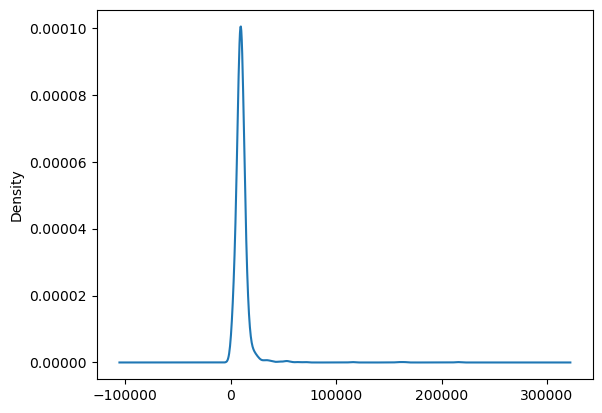

In [301]:
# Numerical Variables  - Skewness & outleiers
# LotFrontSpace, Living Area, 1stFlrsft,
housetrain.LotArea.plot(kind='density')

<Axes: >

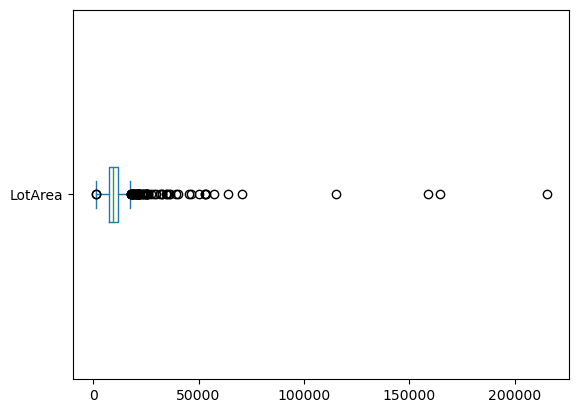

In [302]:
housetrain.LotArea.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

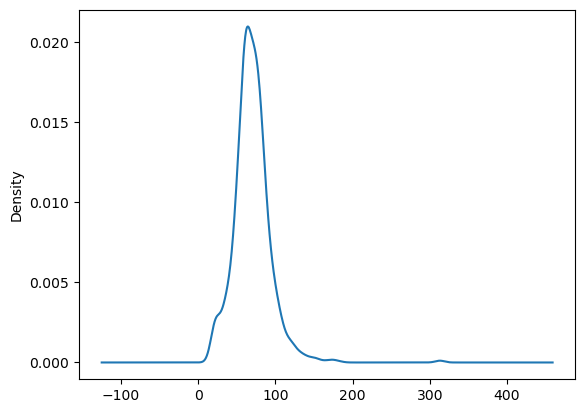

In [303]:
housetrain.LotFrontage.plot(kind='density')

<Axes: >

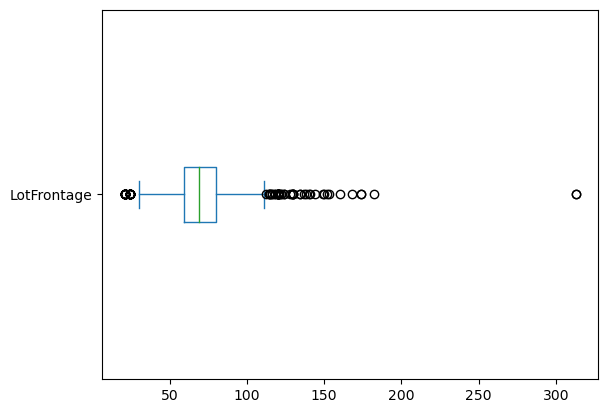

In [304]:
housetrain.LotFrontage.plot(kind='box',vert=False)

In [305]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

<Axes: ylabel='Density'>

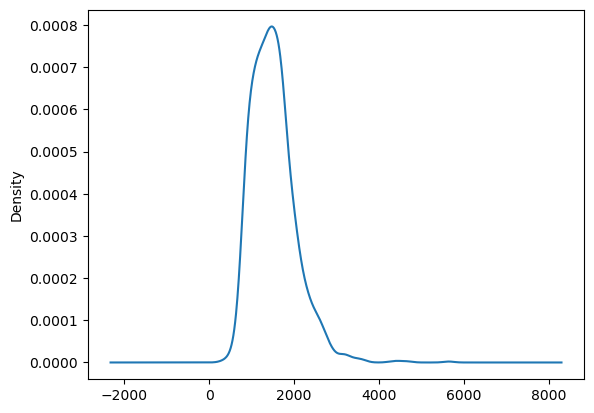

In [306]:
housetrain.GrLivArea.plot(kind='density')

<Axes: >

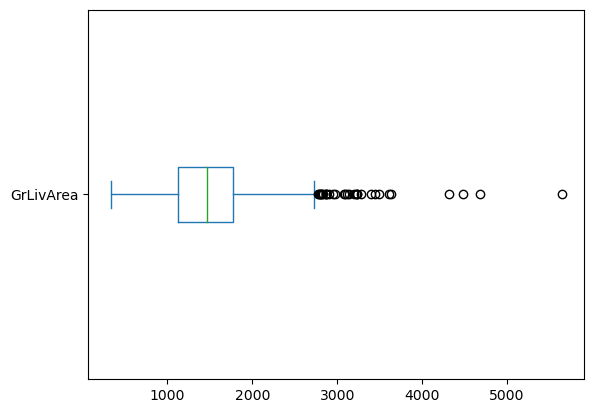

In [307]:
housetrain.GrLivArea.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

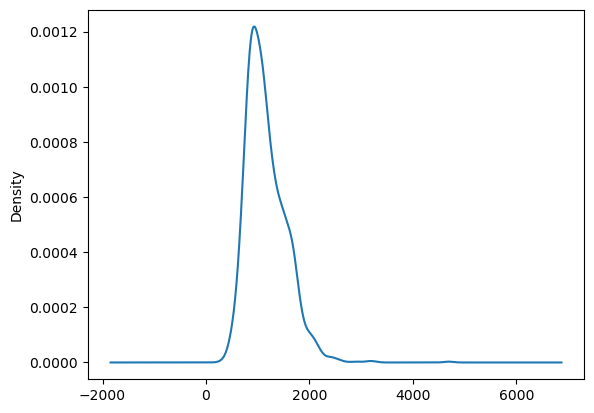

In [308]:
housetrain['1stFlrSF'].plot(kind='density')

<Axes: >

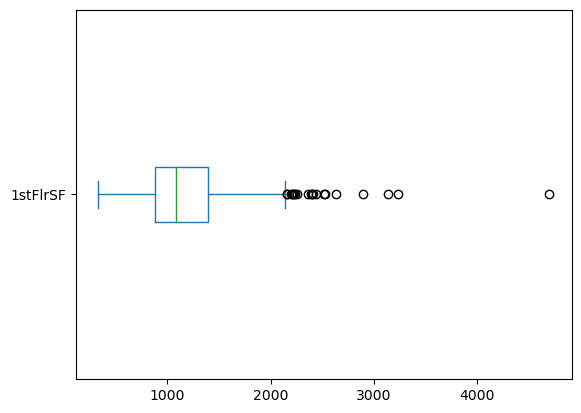

In [309]:
housetrain['1stFlrSF'].plot(kind='box',vert=False)

In [310]:
import seaborn as sns

[Text(0.5, 1.0, 'Multicollinearity Analysis Between Numerical Variables')]

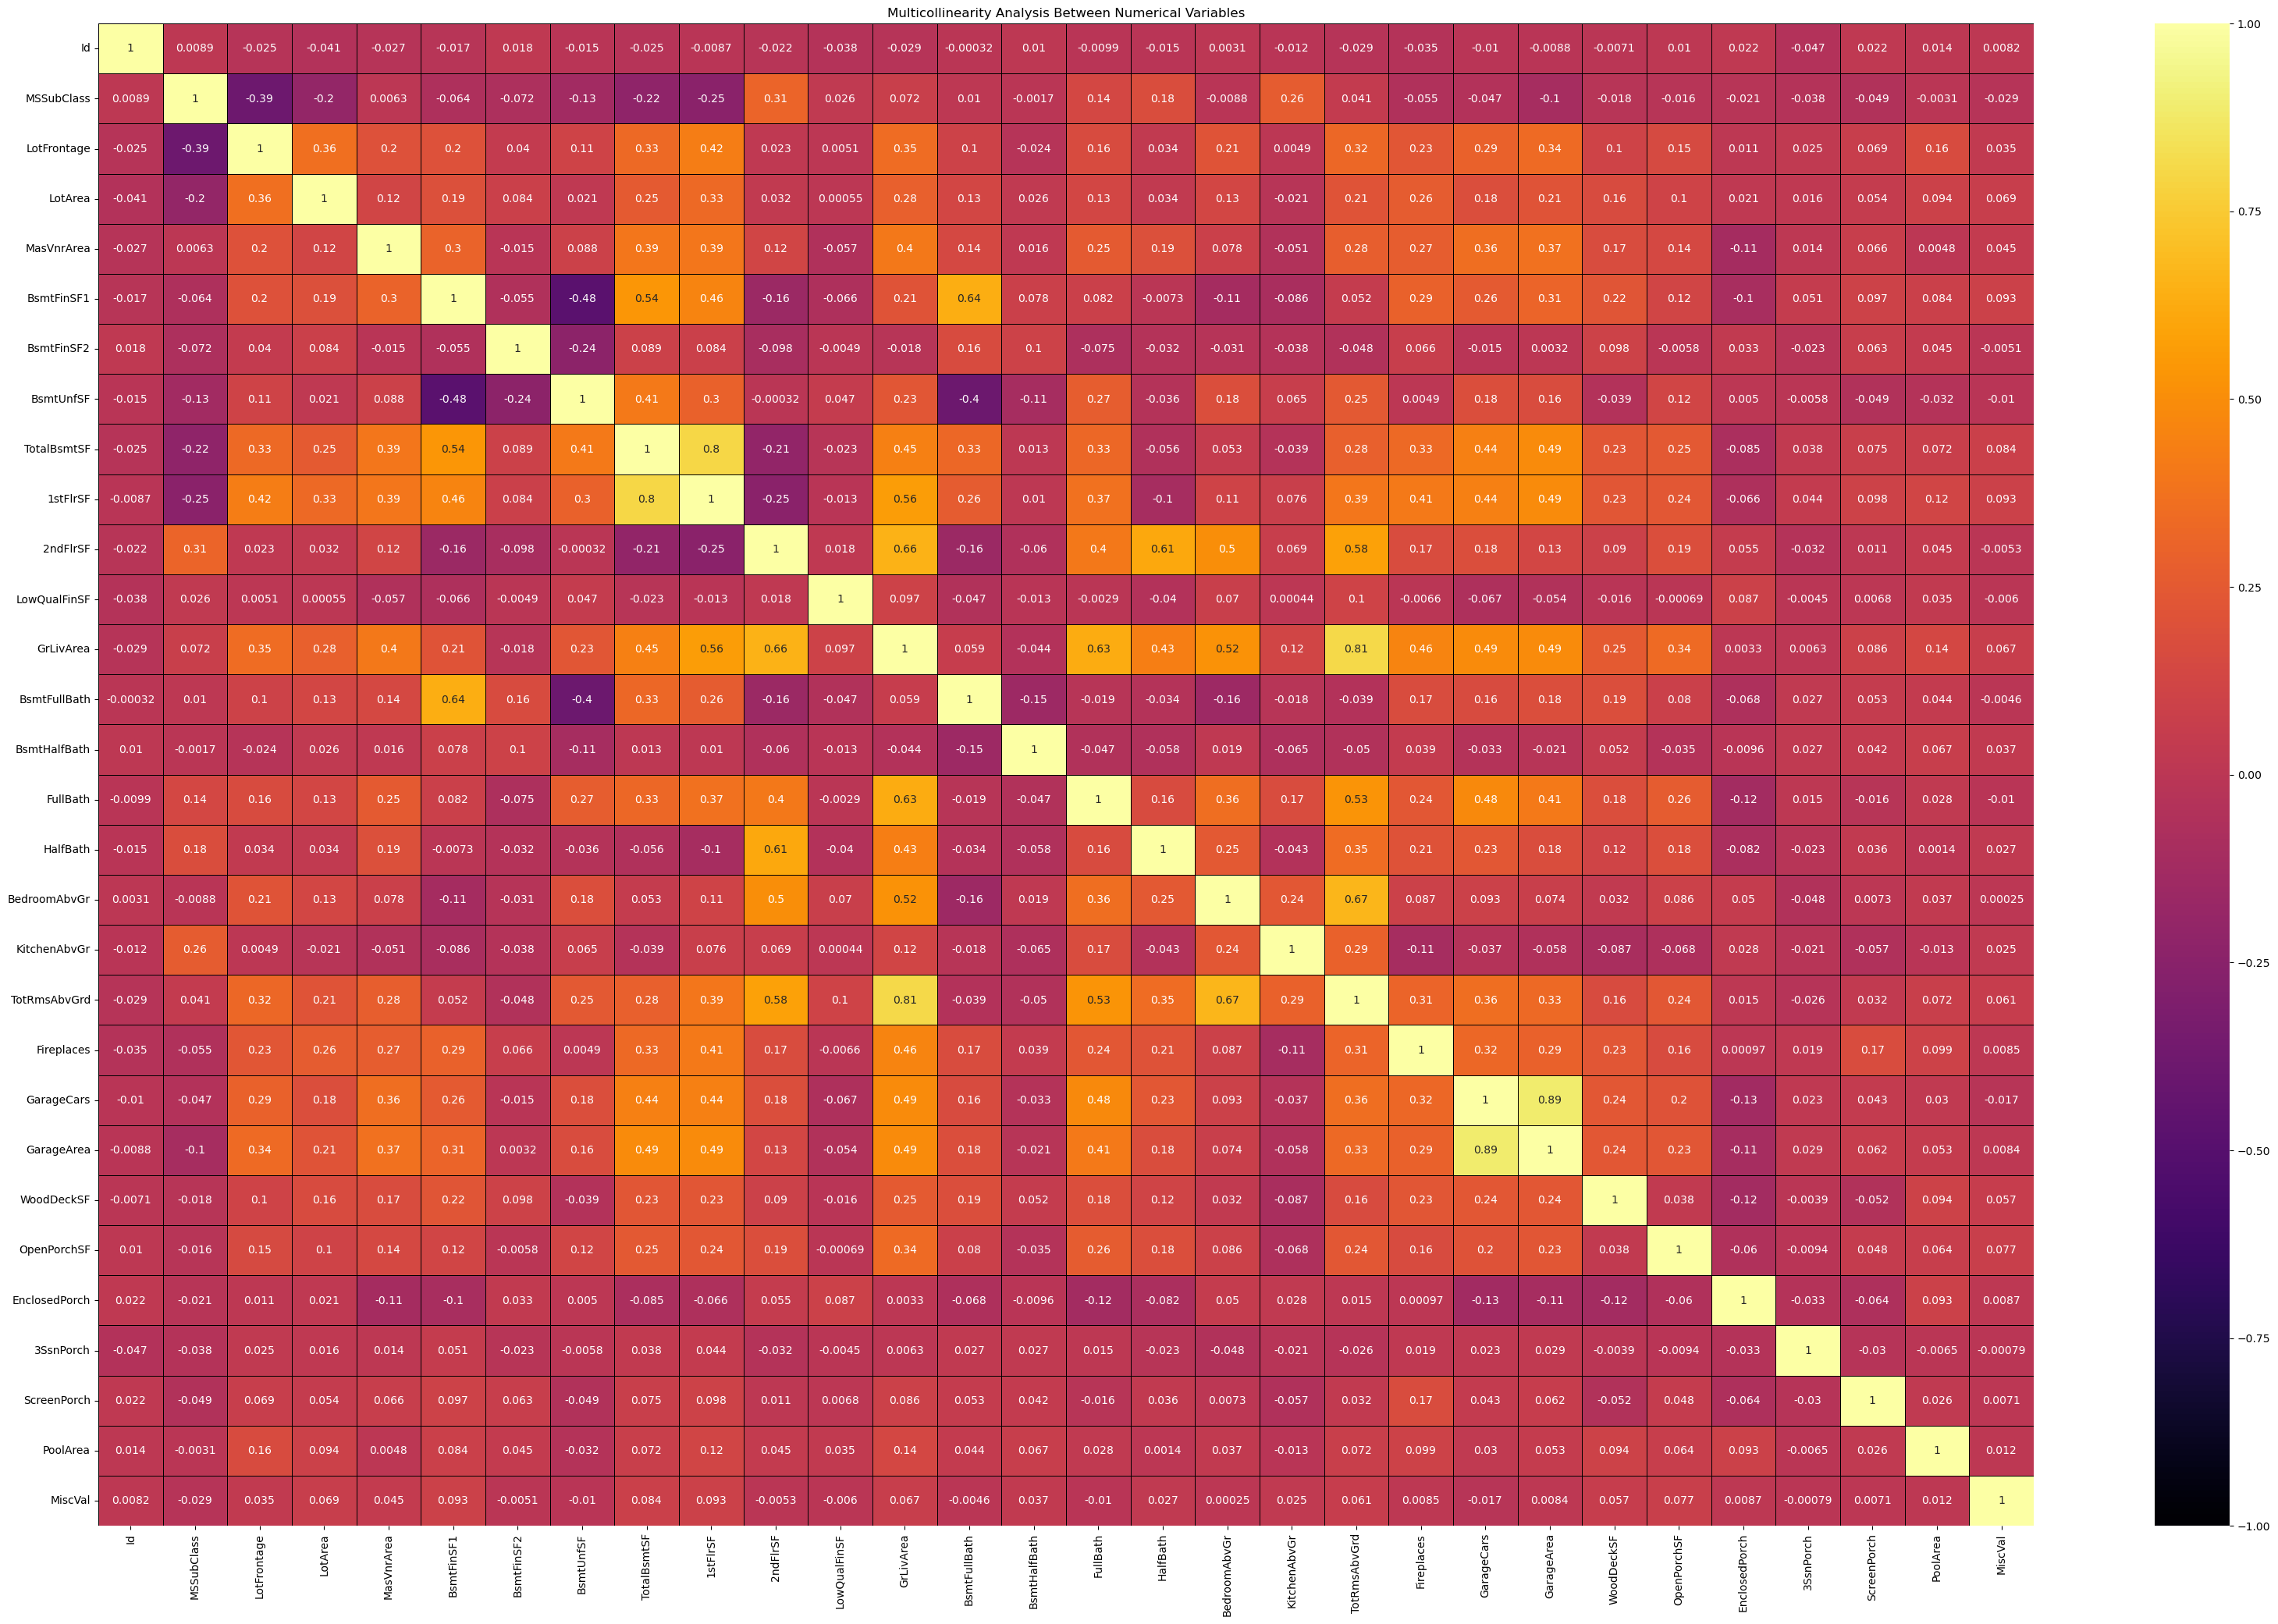

In [311]:
# Multicollinearity Analysis Numerical Variables
plt.figure(figsize=(40,25))
sns.heatmap(numcols.corr(),annot=True,cmap='inferno',vmin=-1,vmax=1,linewidths=0.5,
            linecolor='black').set(title="Multicollinearity Analysis Between Numerical Variables")

In [312]:
from sklearn.linear_model import LinearRegression

In [313]:
reg=LinearRegression()

In [314]:
regmodel=reg.fit(X,y)

In [315]:
regmodel.score(X,y) # R Square

0.8875703843513274

In [316]:
housetest_df=housetest_df.drop('Id',axis=1)

In [317]:
regtestpred=regmodel.predict(housetest_df)

In [318]:
pd.DataFrame(np.exp(regtestpred)).to_csv("reg.csv")

In [319]:
from sklearn.tree import DecisionTreeRegressor

In [320]:
tree=DecisionTreeRegressor(max_depth=8)

In [321]:
treemodel=tree.fit(X,y)

In [322]:
treemodel.score(X,y)

0.9465046848167863

In [323]:
from sklearn.model_selection import cross_val_score

In [324]:
cross_val_score(tree,X,y)

array([0.74132983, 0.73691948, 0.79284658, 0.75584489, 0.75122959])

In [325]:
treepredict=treemodel.predict(housetest_df)

In [326]:
pd.DataFrame(np.exp(treepredict)).to_csv("tree.csv")

In [327]:
# machine learning - supervised learning - multitree models - ensemble techniques - bagging - random forest algorithm
# bagging also called as bootstrap aggregating
# Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and 
#                   accuracy of machine learning algorithms. Particularly it overcomes the overfitting problem in Decision tree.
# Bagging avoids overfitting of data and is used for both regression and classification models, 
#                                                                                     specifically for decision tree algorithms.

In [328]:
# Bagging or Bootstrapping is sampling technique
# Bootstrapping is the method of randomly creating samples of data out of a population with replacement 
#                                                                                            to estimate a population parameter.

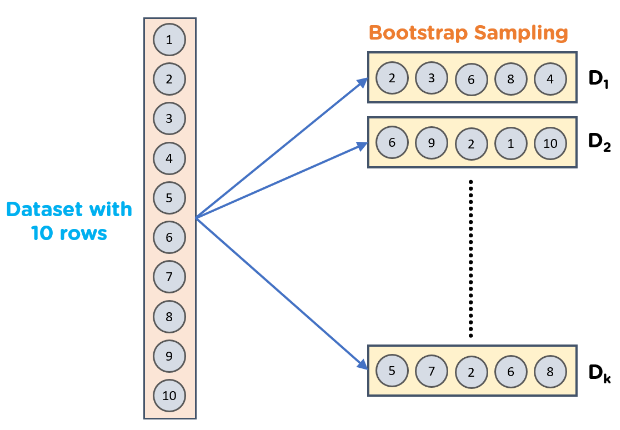

In [329]:
# Random (sampling) forest (multiple trees)
# random forest is an iterative algorith,
# step 1 - specify the number of tress to be built n_estimators = 1000 (1000 decision tree)
# srep 2 - create 1000 ssamples of data from original data and each sample will have 65% of randomly selected rows or 
#                observations and sqrt(numof variables) randomly selected. if data is large enough RAM memory will not be there.
# step 3 - upon creating 1000 samples of data decision tree are parallely built as each sample is independent. 
#                                                                                                    1 decision tree per sample.
# step 4 - prediction will also be done for each tree.
# step 5 - all prediction are aggregated and classification - majority voting    regression - averaging

# tree splitting methods
# 1) gini (default) - 1-Σ(prob)^2
# 2) entropy & information gain
# 3) standard deviation reduction (regression)

# feature/variable importance is provided as part of output

# only disadvantage is computing power.

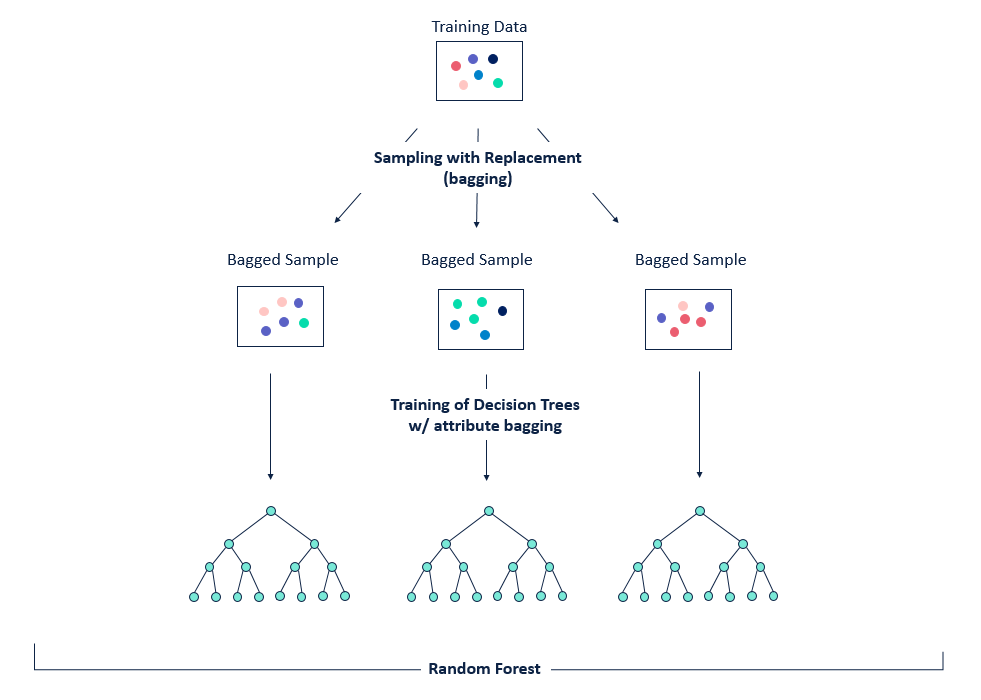

In [330]:
from sklearn.ensemble import RandomForestRegressor

In [331]:
RF=RandomForestRegressor(n_estimators=1000)

In [332]:
RFmodel=RF.fit(X,y)

In [333]:
RFmodel.score(X,y)

0.9833938642398456

In [334]:
cross_val_score(RF,X,y)

array([0.87666802, 0.86847937, 0.87683589, 0.88639551, 0.85673369])

In [335]:
np.mean([0.8761259 , 0.86893819, 0.87563819, 0.88688285, 0.8572662])

0.872970266

In [336]:
RFpredict=RFmodel.predict(housetest_df)

In [338]:
pd.DataFrame(np.exp(RFpredict)).to_csv("RF.csv")

In [339]:
# machine - learning - supervised learning - ensemble methods - boosting method - gradient boosting machine
# boosting algorithms are developed to improve the accuracy of the machine learning models by targetting weak 
#                                                                                                  learners or wrong predicions.
# gradient boosting machine algorithm is both classification and regression algorithm
# step 1 - specify the number of trees to be built n_esstimators =1000
# step 2 - create sample 1 which 65% of observations randomly sampled and sqrt (num of variables) 
#                                                                                              randomly sampled for each sample.
# step 3 - build decision tree for sample 1 & predic
# step 4 - identify wrong predictions and move them to sample 2 and replenish the sample 2
# step 5 - build decision tree 2 and predict
# step 6 - identify wrong predictions and move them to sample 3.

# sequential building of trees as each tree is dependent on previous trees for sample.
# weak learners or wrong predictions are given weightage in trees

In [342]:
from sklearn.ensemble import GradientBoostingRegressor

In [343]:
gbm=GradientBoostingRegressor(n_estimators=3000)

In [345]:
gbmmodel=gbm.fit(X,y)

In [346]:
gbmmodel.score(X,y)

0.9999405524254801

In [347]:
gbmpredict=gbmmodel.predict(housetest_df)

In [348]:
pd.DataFrame(np.exp(gbmpredict)).to_csv("gbm.csv")

In [351]:
n_trees=[100,200,300,400,500,600,800,1000]

In [355]:
for tree in n_trees:
    gb_clf= RandomForestRegressor(
        n_estimators=tree)
    gb_clf.fit(X,y)
    pred=gb_clf.predict(X)
    print("n_tree: ", tree)
    print("Rsquare:",gb_clf.score(X,y))
    print("RMSE:",np.sqrt(np.mean((np.exp(y-pred))**2)))

n_tree:  100
Rsquare: 0.9819402143765815
RMSE: 1.0020774081491917
n_tree:  200
Rsquare: 0.9828065336744494
RMSE: 1.0025913022009025
n_tree:  300
Rsquare: 0.9830044801263098
RMSE: 1.0025805560174235
n_tree:  400
Rsquare: 0.9834148465061464
RMSE: 1.0021676332820362
n_tree:  500
Rsquare: 0.9837492549955437
RMSE: 1.0025688556716097
n_tree:  600
Rsquare: 0.9831707341815927
RMSE: 1.0024061659304733
n_tree:  800
Rsquare: 0.9830271309700911
RMSE: 1.0023996105190554
n_tree:  1000
Rsquare: 0.9833119685243932
RMSE: 1.0025674190561187
